In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import pyhepmc
import itertools
import math

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid', 'navy', 'brown'])

# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'CMU Serif'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.labelpad'] = 9.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 1.
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


# Figure size
mpl.rcParams['figure.figsize'] = 12, 6
mpl.rcParams['figure.dpi'] = 200

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

def fix_ax(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    return ax

In [2]:
#Useful constants
tm15fm2_to_nb = 1.e-8
tm38cm2_to_nb = 1.
GeVm2_to_nb = 389379.09

noah_numevents = 200000

def get_double_diff_xsec(file, angles, delta, xsec, events, bins, low_bins, high_bins):
    
    
    angular_dif = [] 
    double_dif_angles = []
    p1 = []
    p2 = []
    pp1 = []
    pp2 = []
    pp12cos = []
    p12cos = []
    nuc1cos = []
    nuc2cos = []
    nucp1cos = []
    nucp2cos = []
    weights = []
    
    for angle,low_bin,high_bin in zip(angles,low_bins,high_bins):
        double_dif = []
        angular = []

        high_cos = math.cos((angle + delta)*np.pi/180)
        low_cos = math.cos((angle - delta)*np.pi/180)
        delta_cos = (low_cos - high_cos)
        #print(delta_cos)

        #for probe,lep,nuc1,nuc2,nucp1,nucp2 in zip(probeP4, leptonP4, innuc1_p4, innuc2_p4,outnuc1_p4,outnuc2_p4):
        with open(file, 'r') as file:
            for probe,lep,nuc1,nucp1,nuc2,nucp2 in itertools.zip_longest(*[file]*6):
                probe = [float(x) for x in probe.split()]
                lep = [float(x) for x in lep.split()]
                nuc1 = [float(x) for x in nuc1.split()]
                nucp1 = [float(x) for x in nucp1.split()]
                nuc2 = [float(x) for x in nuc2.split()]
                nucp2 = [float(x) for x in nucp2.split()]

                omega = probe[0] - lep[0]
                if omega < 0:
                    print('negative omega!')
                    print(probe[0])
                    print(lep[0])
                probe_3 = [probe[1], probe[2], probe[3]]
                probe_mom = np.sqrt(np.dot(probe_3,probe_3))
                lep_3 = [lep[1], lep[2], lep[3]]
                
                nuc1_3 = [nuc1[1],nuc1[2],nuc1[3]]
                nuc2_3 = [nuc2[1],nuc2[2],nuc2[3]]
                nucp1_3 = [nucp1[1],nucp1[2],nucp1[3]]
                nucp2_3 = [nucp2[1],nucp2[2],nucp2[3]]
                
                cos_theta = np.dot(lep_3,probe_3)/(np.sqrt(np.dot(lep_3,lep_3))*np.sqrt(np.dot(probe_3,probe_3)))
                
                nuc1_mom = np.sqrt(np.dot(nuc1_3,nuc1_3))
                nuc2_mom = np.sqrt(np.dot(nuc2_3,nuc2_3))
                nucp1_mom = np.sqrt(np.dot(nucp1_3,nucp1_3))
                nucp2_mom = np.sqrt(np.dot(nucp2_3,nucp2_3))

                z = np.array([0,0,1])
                nuc1cos.append(np.dot(probe_3,nuc1_3)/nuc1_mom/probe_mom)
                nuc2cos.append(np.dot(probe_3,nuc2_3)/nuc2_mom/probe_mom)
                nucp1cos.append(np.dot(probe_3,nucp1_3)/nucp1_mom/probe_mom)
                nucp2cos.append(np.dot(probe_3,nucp2_3)/nucp2_mom/probe_mom)

                angular.append(cos_theta)
                p1.append(nuc1_mom)
                p2.append(nuc2_mom)
                pp1.append(nucp1_mom)
                pp2.append(nucp2_mom)
                pp12cos.append(np.dot(nucp1_3,nucp2_3)/(nucp1_mom*nucp2_mom))
                p12cos.append(np.dot(nuc1_3,nuc2_3)/(nuc1_mom*nuc2_mom))
                if cos_theta < low_cos and cos_theta > high_cos:
                    #print(cos_theta)
                    double_dif.append(omega)

        bin_width = 2*np.pi*(high_bin - low_bin)/bins

        double_dif = np.array(double_dif)
        angular = np.array(angular)
        angular_dif.append(angular)
        double_dif_angles.append(double_dif)
        weight = (xsec)/events/bin_width
        weights.append(weight)
    
    return angular_dif,double_dif_angles,p1,p2,pp1,pp2,p12cos,pp12cos,nuc1cos,nuc2cos,nucp1cos,nucp2cos,weights

In [3]:
#Neutrinos

#Fixed omega
numbins = 30
omegalows = [100]
omegahighs = [900]

dtheta = 1
angles = [31.79]

dummyxsec = 1.0

noah_angular1SF,noah_dsig1SF,p1_1,p2_1,pp1_1,pp2_1,p12cos_1,pp12cos_1,p1cos_1,p2cos_1,pp1cos_1, pp2cos_1,noah_weights1SF = get_double_diff_xsec('../EW_MEC/test_1_FG_950_31p79_w350_contract_nuZ_altmom.out', angles, dtheta, dummyxsec, noah_numevents, numbins, omegalows, omegahighs)


noah_angular0SF,noah_dsig0SF,p1_0,p2_0,pp1_0,pp2_0,p12cos_0,pp12cos_0,p1cos_0,p2cos_0,pp1cos_0, pp2cos_0,noah_weights0SF = get_double_diff_xsec('../EW_MEC/test_0_FG_950_31p79_w350_contract_nuZ_altmom.out', angles, dtheta, dummyxsec, noah_numevents, numbins, omegalows, omegahighs)

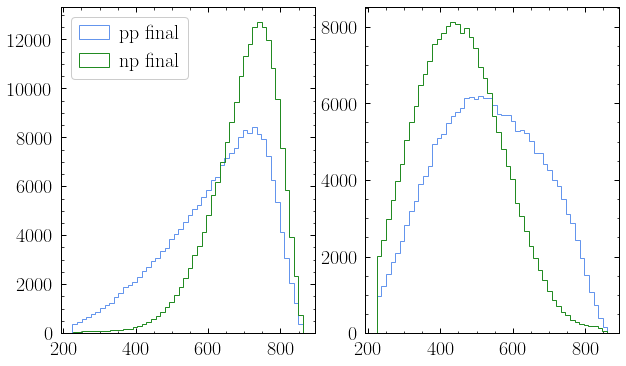

In [4]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].hist(pp1_0,bins=50,label='pp final',histtype='step')
ax[0].hist(pp1_1,bins=50,label='np final',histtype='step')
ax[1].hist(pp2_0,bins=50,label='pp final',histtype='step')
ax[1].hist(pp2_1,bins=50,label='np final',histtype='step')
ax[0].legend()
